### Tutorial 4 Pivot tables and plots

#### Creating yearly data by aggregating monthly data

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df_sales_volume_data = pd.read_csv('complete_dataset.csv')

In [3]:
df_sales_volume_data

,Prodno,Product,Year,Month,Sales,Number_of_items
0,E10100,ClarencetheCowsmall,2015,January,1590.0,2
1,E10110,ClarencetheCowmedium,2015,January,1130.0,1
2,E10120,ClarencetheCowlarge,2015,January,3090.0,2
3,E10160,ClarencetheCowPlanter,2015,January,4785.0,3
4,E10200,BrucetheBullsmall,2015,January,1640.0,2
...,...,...,...,...,...,...
4839,E10600,TheBlindMouse,2020,December,2252.0,4
4840,E40310,KoolKombiBlue,2020,December,3650.0,1
4841,E40322,HoleinOneCooler,2020,December,2895.0,1
4842,E70172,MiniSnowman,2020,December,643.5,2


#### First, we create a pivot table, where we aggregate the sum of the number of items sold per product and year. When there are no iems sold, we replace with zero instead of missing value.

#### Then we set margins to true to create totals for rows and columns

In [4]:
pivot = pd.pivot_table(df_sales_volume_data,index=["Year"],values=["Number_of_items"],
    columns=["Prodno"],aggfunc='sum',fill_value=0, margins=True)

In [5]:
pivot

Number_of_items                                                     \
Prodno        BYN2506    BYN2509    CR1100    CR1105    CR1110    CR1200    
Year                                                                        
2015                 0          0         0         0         0         0   
2016                 0          0         0         0         0         0   
2017                 0          0         0         0         0         0   
2018                 0          0         0         0         0         0   
2019                 0          0        15        16        15        43   
2020                19         18         7         3         6        19   
All                 19         18        22        19        21        62   

                                                ...                       \
Prodno   CR1205    CR1210    CR1300    CR1305   ... E16140 E16150 E16180   
Year                                            ...                        
2015           0         0         0         0  ...      0      0      0   
2016           0         0         0         0  ...      1      1      1   
2017           0         0         0         0  ...      0      0      0   
2018           0         0         0         0  ...      0      0      0   
2019          44         5         6         7  ...      0      0      0   
2020          16         1        13        11  ...      0      0      0   
All           60         6        19        18  ...      1      1      1   

                                                      
Prodno E21530 E40310 E40340 E40400 E40410 Ice    All  
Year                                                  
2015        0      0      0      0      0   0   2472  
2016        2     10      2      4      3   0   2594  
2017        0      0      0      0      0  23   5941  
2018        0      0      0      0      0   0   5941  
2019        0      0      0      0      0   0   4509  
2020        0      0      0      0      0   0   1514  
All         2     10      2      4      3  23  22971  

[7 rows x 478 columns]

#### We convert the pivot to dataframe so it is easier to work with

In [6]:
df_pivot=pd.DataFrame(pivot)

In [7]:
df_pivot

Number_of_items                                                     \
Prodno        BYN2506    BYN2509    CR1100    CR1105    CR1110    CR1200    
Year                                                                        
2015                 0          0         0         0         0         0   
2016                 0          0         0         0         0         0   
2017                 0          0         0         0         0         0   
2018                 0          0         0         0         0         0   
2019                 0          0        15        16        15        43   
2020                19         18         7         3         6        19   
All                 19         18        22        19        21        62   

                                                ...                       \
Prodno   CR1205    CR1210    CR1300    CR1305   ... E16140 E16150 E16180   
Year                                            ...                        
2015           0         0         0         0  ...      0      0      0   
2016           0         0         0         0  ...      1      1      1   
2017           0         0         0         0  ...      0      0      0   
2018           0         0         0         0  ...      0      0      0   
2019          44         5         6         7  ...      0      0      0   
2020          16         1        13        11  ...      0      0      0   
All           60         6        19        18  ...      1      1      1   

                                                      
Prodno E21530 E40310 E40340 E40400 E40410 Ice    All  
Year                                                  
2015        0      0      0      0      0   0   2472  
2016        2     10      2      4      3   0   2594  
2017        0      0      0      0      0  23   5941  
2018        0      0      0      0      0   0   5941  
2019        0      0      0      0      0   0   4509  
2020        0      0      0      0      0   0   1514  
All         2     10      2      4      3  23  22971  

[7 rows x 478 columns]

#### We drop the column 'All' that sums up each row and keep the row 'All' since we need it to sort top sold products

In [8]:
df_pivot.columns=df_pivot.columns.droplevel() 
df_pivot.drop('All', axis=1,inplace=True) 
df_pivot

Prodno,BYN2506,BYN2509,CR1100,CR1105,CR1110,CR1200,CR1205,CR1210,CR1300,CR1305,...,E13150,E16140,E16150,E16180,E21530,E40310,E40340,E40400,E40410,Ice
Year,,,,,,,,,,,,,,,,,,,,,
2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,10,2,4,3,0
2017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
2018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019,0,0,15,16,15,43,44,5,6,7,...,0,0,0,0,0,0,0,0,0,0
2020,19,18,7,3,6,19,16,1,13,11,...,0,0,0,0,0,0,0,0,0,0
All,19,18,22,19,21,62,60,6,19,18,...,1,1,1,1,2,10,2,4,3,23


#### 1) We select the top 10 products and sort them. 
#### 2) We create a list with the top 10 sold products
#### 3) We drop 'All' row since we dont need it anymore to make the selection
#### 4) We slice the pivot_df and capture only the 10 top sold products

In [9]:
prod_list=pd.DataFrame(df_pivot.loc['All'].sort_values(ascending=False).head(10))
prod_list=prod_list.index.tolist()
df_pivot.drop('All',inplace=True)
df_top_prod=df_pivot[prod_list] 

In [10]:
prod_list

['  E10600 ',
 '  E11600 ',
 '  SPFIT-L-LUS ',
 '  SPFIT-M-LUS ',
 '  E40460 ',
 '  Ice ',
 '  FITK-M-BLK ',
 '  E11630 ',
 '  E13110 ',
 '  FITK-L-BLK ']

#### Finally, we plot the yearly demand for the top 10 products

Text(0.5, 0, 'Yearly demand top 10 products')

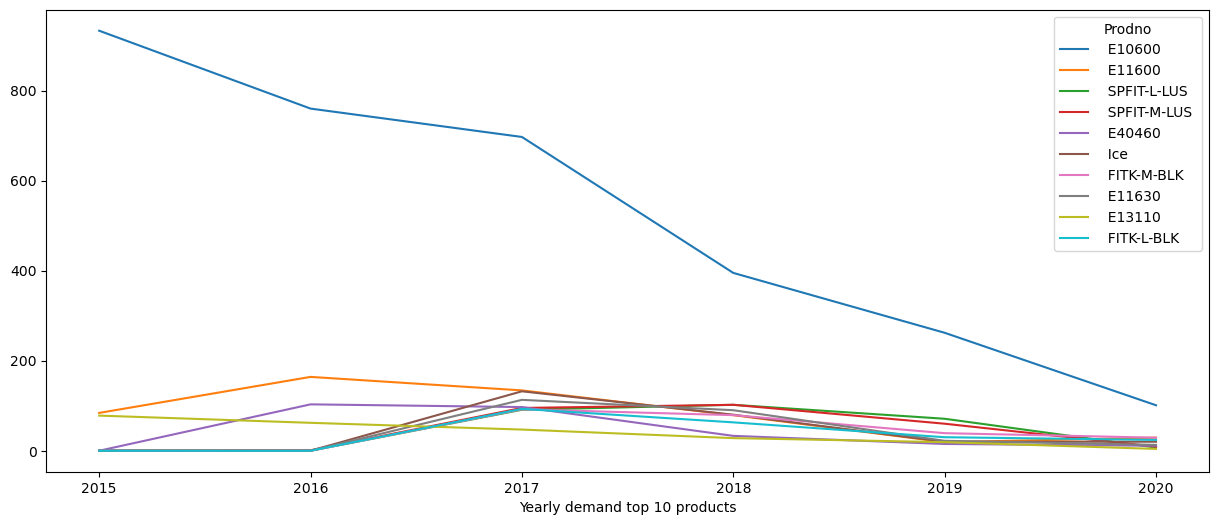

In [11]:
(df_top_prod).plot(figsize=(15,6))
plt.xlabel('Yearly demand top 10 products')

### Tutorial 5 Calculations of EOQ, weighted moving averages, and smoothed moving averages

#### To calculate yearly EOQ, we start with transposing the pivot table, years as columns and products as rows and reset the index.

In [12]:
pivot.reset_index

<bound method DataFrame.reset_index of        Number_of_items                                                     \
Prodno        BYN2506    BYN2509    CR1100    CR1105    CR1110    CR1200    
Year                                                                        
2015                 0          0         0         0         0         0   
2016                 0          0         0         0         0         0   
2017                 0          0         0         0         0         0   
2018                 0          0         0         0         0         0   
2019                 0          0        15        16        15        43   
2020                19         18         7         3         6        19   
All                 19         18        22        19        21        62   

                                                ...                       \
Prodno   CR1205    CR1210    CR1300    CR1305   ... E16140 E16150 E16180   
Year                                  

In [13]:
pivot.dtypes


                 Prodno    
Number_of_items    BYN2506     int64
                   BYN2509     int64
                   CR1100      int64
                   CR1105      int64
                   CR1110      int64
                               ...  
                 E40340        int64
                 E40400        int64
                 E40410        int64
                 Ice           int64
                 All           int64
Length: 478, dtype: object

In [14]:
pivot=pivot.T
pivot=pivot.reset_index(drop=True)

In [15]:
pivot

Year,2015,2016,2017,2018,2019,2020,All
0,0,0,0,0,0,19,19
1,0,0,0,0,0,18,18
2,0,0,0,0,15,7,22
3,0,0,0,0,16,3,19
4,0,0,0,0,15,6,21
...,...,...,...,...,...,...,...
473,0,2,0,0,0,0,2
474,0,4,0,0,0,0,4
475,0,3,0,0,0,0,3
476,0,0,23,0,0,0,23


#### Calculate EOQ by looping over one column at a time

In [16]:
for i in pivot.columns.tolist()[1:-1]:
    pivot[f'EOQ_{i}']=np.sqrt(pivot[i]*0.05/0.45*2)

In [17]:
pivot

Year,2015,2016,2017,2018,2019,2020,All,EOQ_2016,EOQ_2017,EOQ_2018,EOQ_2019,EOQ_2020
0,0,0,0,0,0,19,19,0.000000,0.000000,0.000000,0.000000,2.054805
1,0,0,0,0,0,18,18,0.000000,0.000000,0.000000,0.000000,2.000000
2,0,0,0,0,15,7,22,0.000000,0.000000,0.000000,1.825742,1.247219
3,0,0,0,0,16,3,19,0.000000,0.000000,0.000000,1.885618,0.816497
4,0,0,0,0,15,6,21,0.000000,0.000000,0.000000,1.825742,1.154701
...,...,...,...,...,...,...,...,...,...,...,...,...
473,0,2,0,0,0,0,2,0.666667,0.000000,0.000000,0.000000,0.000000
474,0,4,0,0,0,0,4,0.942809,0.000000,0.000000,0.000000,0.000000
475,0,3,0,0,0,0,3,0.816497,0.000000,0.000000,0.000000,0.000000
476,0,0,23,0,0,0,23,0.000000,2.260777,0.000000,0.000000,0.000000


#### Forecast quantities using 4 year weighted moving averages with weights 0.4, 0.3, 0.2 and 0.1 starting from the most recent year, for the 10 top products

In [18]:
weights=np.array([0.1,0.2,0.3,0.4])
sum_weights=np.sum(weights)

#### We create a dictionary with elements from the columns list of our top_prod_df and value 0. Add year 2021 to be able to forecast. This dictionary is then added to the original dataframe with the index 2021

In [19]:
my_dict=dict((el,0) for el in df_top_prod.columns.tolist())
df1 = pd.DataFrame([my_dict], index=['2021'])
df_top_prod = pd.concat([df_top_prod, df1], axis=0)
df_top_prod


,E10600,E11600,SPFIT-L-LUS,SPFIT-M-LUS,E40460,Ice,FITK-M-BLK,E11630,E13110,FITK-L-BLK
2015,933,84,0,0,0,0,0,0,78,0
2016,760,164,0,1,103,0,0,0,62,0
2017,697,134,91,95,97,132,92,113,47,93
2018,395,79,102,102,33,80,79,90,28,63
2019,262,19,71,60,15,20,39,22,19,30
2020,101,29,7,9,11,20,29,13,4,24
2021,0,0,0,0,0,0,0,0,0,0


#### Loop over the columns to calculate weighted moving averages. 
#### Create a new column and name it with the formatting method weighted_'x', where x is the original column name. 
#### Then the value at each specific cell is smoothed over a window of 4 years, by applying specified weights, with higher weights to the recent years and shifting it 1 cell below so that we get the forecast of the next year

In [20]:
for i in df_top_prod.columns.tolist()[:10]:
    df_top_prod[f'weighted_{i}']=(df_top_prod[i]).rolling(window=4).apply(lambda x: np.sum(weights*x)/sum_weights,raw=False).shift(1)
df_top_prod

,E10600,E11600,SPFIT-L-LUS,SPFIT-M-LUS,E40460,Ice,FITK-M-BLK,E11630,E13110,FITK-L-BLK,weighted_ E10600,weighted_ E11600,weighted_ SPFIT-L-LUS,weighted_ SPFIT-M-LUS,weighted_ E40460,weighted_ Ice,weighted_ FITK-M-BLK,weighted_ E11630,weighted_ E13110,weighted_ FITK-L-BLK
2015,933,84,0,0,0,0,0,0,78,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,760,164,0,1,103,0,0,0,62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,697,134,91,95,97,132,92,113,47,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,395,79,102,102,33,80,79,90,28,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,262,19,71,60,15,20,39,22,19,30,612.4,113.0,68.1,69.5,62.9,71.6,59.2,69.9,45.5,53.1
2020,101,29,7,9,11,20,29,13,4,24,438.7,74.5,77.2,73.7,45.6,58.4,57.7,58.4,31.6,49.5
2021,0,0,0,0,0,0,0,0,0,0,267.7,46.5,53.6,51.5,25.2,43.2,48.3,41.1,17.6,40.5


#### To forecast  quantities exponential moving average, similarly to WMA, we once again loop over the columns list.
#### Differently from WMA, EWM, is a built in function in Python, where alfa is calculated as 2/span+1 (look up documentation for more information). 
#### We use adjust False so that it starts on the row we indicate, in this case index 3 and ignores previous rows(0,1,2)

In [21]:
for i in df_top_prod.columns.tolist():
    df_top_prod[f'ema_{i}']=df_top_prod[i][3:].ewm(span=4,adjust=False).mean().shift(1)

In [22]:
df_top_prod

,E10600,E11600,SPFIT-L-LUS,SPFIT-M-LUS,E40460,Ice,FITK-M-BLK,E11630,E13110,FITK-L-BLK,...,ema_weighted_ E10600,ema_weighted_ E11600,ema_weighted_ SPFIT-L-LUS,ema_weighted_ SPFIT-M-LUS,ema_weighted_ E40460,ema_weighted_ Ice,ema_weighted_ FITK-M-BLK,ema_weighted_ E11630,ema_weighted_ E13110,ema_weighted_ FITK-L-BLK
2015,933,84,0,0,0,0,0,0,78,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,760,164,0,1,103,0,0,0,62,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,697,134,91,95,97,132,92,113,47,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,395,79,102,102,33,80,79,90,28,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,262,19,71,60,15,20,39,22,19,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,101,29,7,9,11,20,29,13,4,24,...,612.40,113.0,68.10,69.50,62.90,71.60,59.2,69.9,45.50,53.10
2021,0,0,0,0,0,0,0,0,0,0,...,542.92,97.6,71.74,71.18,55.98,66.32,58.6,65.3,39.94,51.66


#### Export the data to excel

In [23]:
df_top_prod.to_excel("df_top_prod.xlsx")